<h1><center>771764_A21_T3A: MSc Research Project</center></h1> 

## Venu Madhuri Yerramsetti
### ST ID : 202124284

<h2 align="center">Skin related issues diagnosis using image analysis</h2>  

# Final Model to integrate with the website

## Importing necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
import matplotlib.pyplot as plt

## Path for the Images folder

### Dataset is divided into training and test datasets from the augmented images folder

In [2]:
#data_dir = "gdrive/My Drive/flower_photos"
data_dir = "./augmented_image"

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18975 files belonging to 5 classes.
Using 14232 files for training.


In [3]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)


Found 18975 files belonging to 5 classes.
Using 4743 files for validation.
['Diabetic', 'Eczema', 'PU', 'Psoriasis', 'VLU']


## The visual representation of some of the images from the dataset

(32, 180, 180, 3)
(32,)


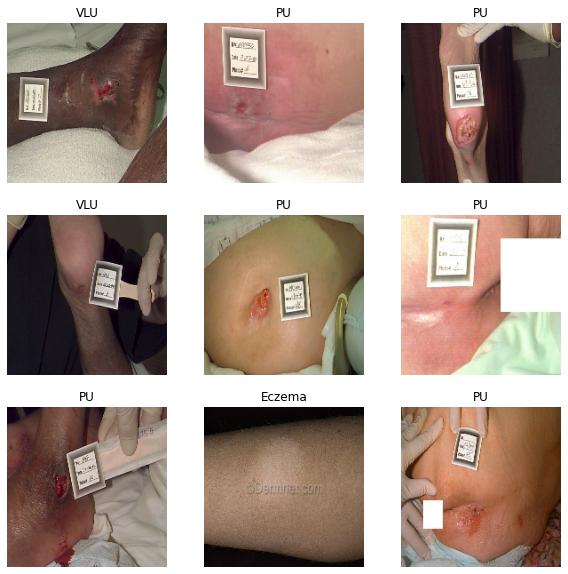

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])


## In the following cell, you can see an example of some of the images after data augmentation

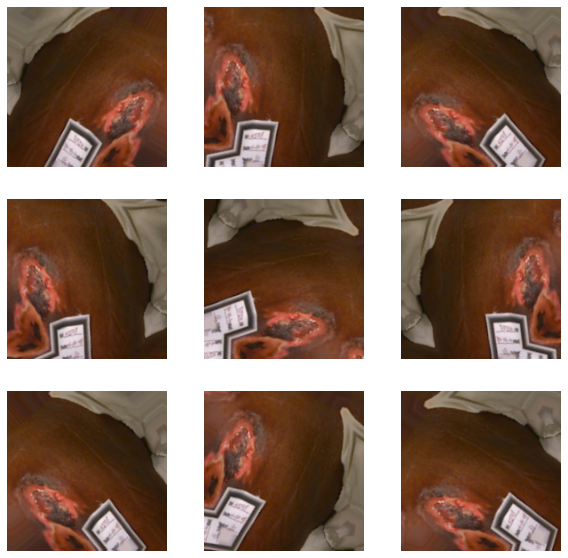

In [5]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

# Training the model using Convolutional Neural networks

In [6]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(rate=0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(rate=0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(rate=0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(rate=0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(rate=0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()




0.0 1.0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                          

## Executing the model

In [7]:
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/25
445/445 [==============================] - 244s 545ms/step - loss: 1.0604 - accuracy: 0.5579 - val_loss: 0.8979 - val_accuracy: 0.6272
Epoch 2/25
445/445 [==============================] - 329s 738ms/step - loss: 0.7948 - accuracy: 0.6369 - val_loss: 0.7951 - val_accuracy: 0.6464
Epoch 3/25
445/445 [==============================] - 308s 691ms/step - loss: 0.7585 - accuracy: 0.6534 - val_loss: 0.7727 - val_accuracy: 0.6475
Epoch 4/25
445/445 [==============================] - 16114s 36s/step - loss: 0.7281 - accuracy: 0.6698 - val_loss: 0.7539 - val_accuracy: 0.6643
Epoch 5/25
445/445 [==============================] - 259s 582ms/step - loss: 0.7058 - accuracy: 0.6799 - val_loss: 0.7350 - val_accuracy: 0.6728
Epoch 6/25
445/445 [==============================] - 596s 1s/step - loss: 0.6690 - accuracy: 0.6961 - val_loss: 0.6719 - val_accuracy: 0.6894
Epoch 7/25
445/445 [==============================] - 251s 564ms/step - loss: 0.6478 - accuracy: 0.7069 - val_loss: 0.6726 - va

## Visualisation of the Trained Model

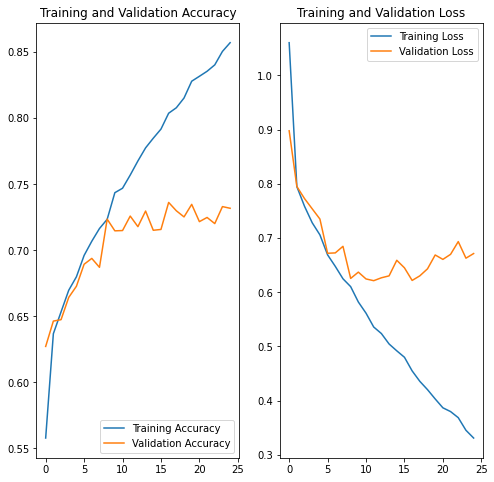

In [8]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [10]:
model.save('cnn_model')